In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats


Data Dictionary
Variable	Definition	                                   Key
survival	Survival	                                   0 = No, 1 = Yes
pclass	    Ticket class	                               1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation

In [3]:
df = pd.read_csv('train.csv')


In [4]:
df.shape


(891, 12)

# Duplicated Values


In [5]:
df.duplicated().sum()


0

In [6]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Age and cabin has some missing values 


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling age missing values


In [9]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [10]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Dropping some unimportant features


In [11]:
df.drop(['PassengerId', 'Cabin','Name'], axis=1, inplace= True)


In [12]:
df.dropna(subset=['Embarked'], inplace=True)


In [13]:
df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Finding inconsistent categories


In [14]:
inconsistent_categories = set(df['Sex']).difference(df['Sex'])
print(inconsistent_categories)

set()


# Removing Outliers

In [15]:
z_threshold = 2


# Calculate Z-scores for 'Age' and 'Fare' columns


In [16]:
z_scores_age = stats.zscore(df['Age'])
z_scores_fare = stats.zscore(df['Fare'])


# Filter out rows where Z-scores exceed the threshold for 'Age' and 'Fare'


In [17]:
df_no_outliers = df[(abs(z_scores_age) <= z_threshold) & (abs(z_scores_fare) <= z_threshold)]

Now 'df_no_outliers' contains the data with outliers removed from 'Age' and 'Fare' columns

In [18]:
def cap_outliers(df, column, iqr_factor=1.5):
  """Caps outliers in a given column of a Pandas DataFrame.

  Args:
    df: A Pandas DataFrame.
    column: The name of the column to cap outliers in.
    iqr_factor: A factor used to calculate the outlier thresholds.

  Returns:
    A Pandas DataFrame with the outliers capped.
  """

  # Calculate the IQR of the column.
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1

  # Calculate the outlier thresholds.
  lower_threshold = q1 - (iqr_factor * iqr)
  upper_threshold = q3 + (iqr_factor * iqr)

  # Cap the outliers.
  df[column] = df[column].where(df[column] >= lower_threshold, lower_threshold)
  df[column] = df[column].where(df[column] <= upper_threshold, upper_threshold)

  return df

df = cap_outliers(df.copy(), 'Fare')



# Separing the numeric and categorical data

In [19]:
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Ticket','Embarked']]


In [20]:
df.to_csv('titanic_clean.csv', index=False)


# Summary statistics

In [21]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mode = df['Age'].mode().values[0]  # Mode can be a list, so we take the first element
age_std = df['Age'].std()

fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()
fare_mode = df['Fare'].mode().values[0]
fare_std = df['Fare'].std()

# Print the calculated statistics
print("Summary Statistics for 'Age' column:")
print(f"Mean: {age_mean}")
print(f"Median: {age_median}")
print(f"Mode: {age_mode}")
print(f"Standard Deviation: {age_std}\n")

print("Summary Statistics for 'Fare' column:")
print(f"Mean: {fare_mean}")
print(f"Median: {fare_median}")
print(f"Mode: {fare_mode}")
print(f"Standard Deviation: {fare_std}")


Summary Statistics for 'Age' column:
Mean: 29.65344637067425
Median: 29.69911764705882
Mode: 29.69911764705882
Standard Deviation: 12.968366309252332

Summary Statistics for 'Fare' column:
Mean: 23.956061304836897
Median: 14.4542
Mode: 65.6563
Standard Deviation: 20.414996607664037


In [22]:
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,23.956061
std,0.486260,0.834700,12.968366,1.103705,0.806761,20.414997
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,65.656300


# Data Visualization

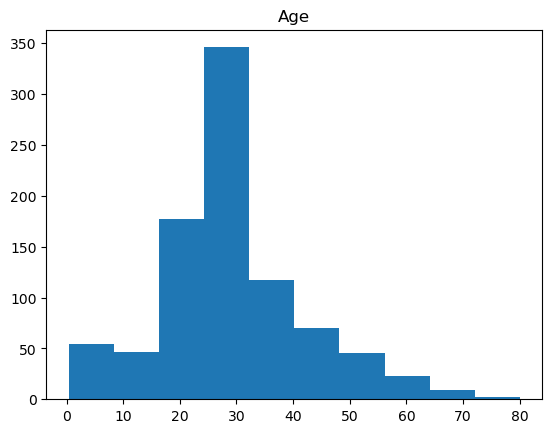

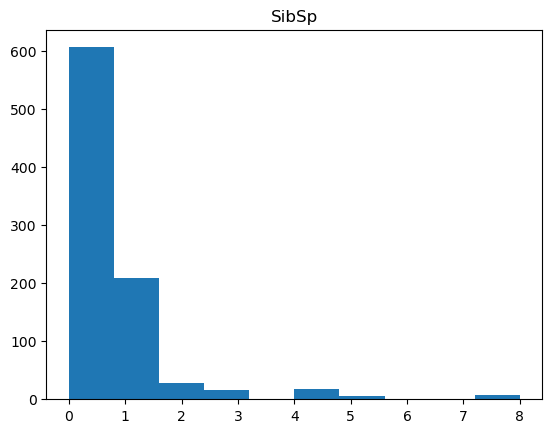

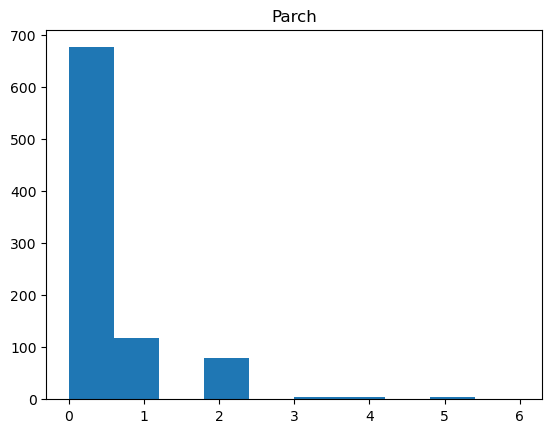

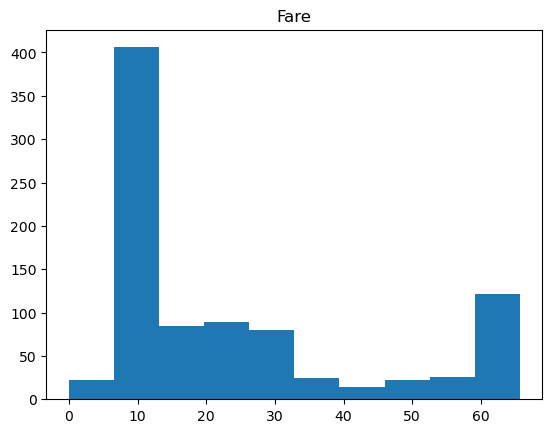

In [23]:
#distributions for all numeric variables 
#Only age is normally distriputed but the reset aren't, so we'll normalize them.

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()


<Axes: xlabel='Age', ylabel='Count'>

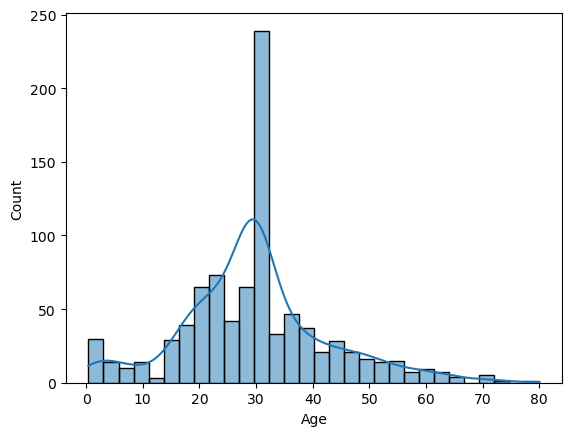

In [24]:
sns.histplot(data=df, x="Age", kde=True)


<Axes: xlabel='Pclass', ylabel='count'>

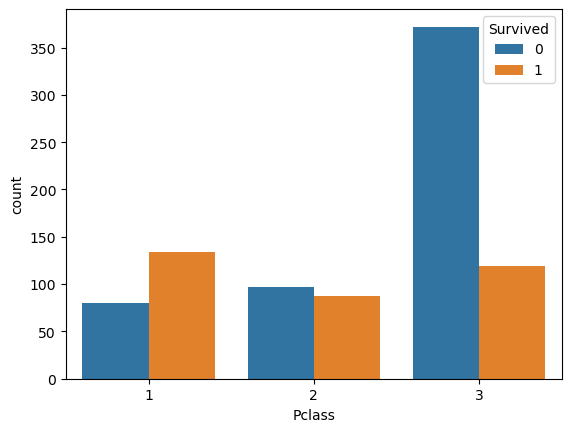

In [25]:
# Create a bar chart of the 'Pclass' column
sns.countplot(data=df, x="Pclass", hue="Survived")

            Age     SibSp     Parch      Fare
Age    1.000000 -0.231875 -0.178232  0.131713
SibSp -0.231875  1.000000  0.414542  0.335817
Parch -0.178232  0.414542  1.000000  0.296199
Fare   0.131713  0.335817  0.296199  1.000000


<Axes: >

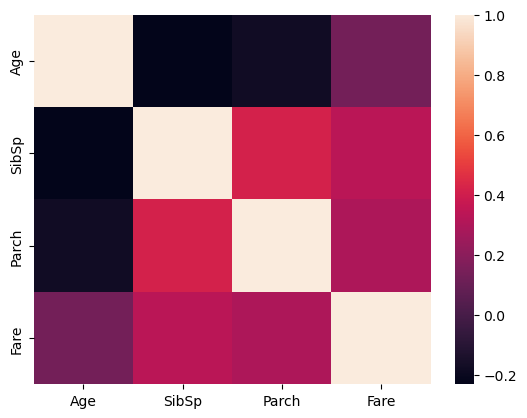

In [26]:
print(df_num.corr())
sns.heatmap(df_num.corr())
#Siblings and family tends to travel together.
